In [727]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set_style('whitegrid')

In [728]:
df = pd.read_csv('input/weather.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (14001, 21)



,SEASON,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,...,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_DP,NEWDELHI_GRADE,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR
0,2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10,68.5000,624,601.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,8
1,2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45,68.5599,597,584.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,8
2,2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80,68.6000,584,571.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,3
3,2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15,68.6075,566,551.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,0
4,2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50,68.6000,551,538.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,358


In [729]:
import warnings

warnings.filterwarnings('ignore')

In [730]:
df.shape

(14001, 21)

In [731]:
col_names = df.columns

col_names

Index(['SEASON', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'LAT', 'LON',
       'DIST2LAND', 'LANDFALL', 'WMO_WIND', 'WMO_PRES', 'NEWDELHI_WIND',
       'NEWDELHI_PRES', 'NEWDELHI_DP', 'NEWDELHI_GRADE', 'REUNION_TYPE',
       'REUNION_WIND', 'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED',
       'STORM_DIR'],
      dtype='object')

In [732]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NEWDELHI_GRADE', 'REUNION_TYPE']


In [733]:
df[categorical].head()

,BASIN,SUBBASIN,NAME,ISO_TIME,NEWDELHI_GRADE,REUNION_TYPE
0,NI,AS,ASHOBAA,2015-06-06 06:00:00,CS,UNK
1,NI,AS,ASHOBAA,2015-06-06 09:00:00,CS,UNK
2,NI,AS,ASHOBAA,2015-06-06 12:00:00,CS,UNK
3,NI,AS,ASHOBAA,2015-06-06 15:00:00,CS,UNK
4,NI,AS,ASHOBAA,2015-06-06 18:00:00,CS,UNK


In [734]:
# check missing values in categorical variables

df[categorical].isnull().sum()

BASIN             0
SUBBASIN          0
NAME              0
ISO_TIME          0
NEWDELHI_GRADE    0
REUNION_TYPE      0
dtype: int64

In [735]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [736]:
for var in categorical: 
    
    print(df[var].value_counts())

SI    10326
NI     2916
SP      502
WP      257
Name: BASIN, dtype: int64
MM    6655
WA    3942
BB    1516
AS    1400
EA     488
Name: SUBBASIN, dtype: int64
NOT_NAMED    2013
FREDDY        240
NATHAN        181
CALVINIA      139
URIAH         131
             ... 
GREG           15
HAMOON         15
ASHLEY         13
SITRANG        11
MIDHILI         7
Name: NAME, Length: 174, dtype: int64
21-01-2021 09:00    4
20-01-2021 00:00    4
20-01-2021 03:00    4
20-01-2021 12:00    4
20-01-2021 15:00    4
                   ..
11-04-2015 21:00    1
12-04-2015 00:00    1
12-04-2015 03:00    1
12-04-2015 06:00    1
22-05-2023 18:00    1
Name: ISO_TIME, Length: 10917, dtype: int64
CS      12300
D         830
DD        375
VSCS      316
SVCS      154
SCS        25
LPA         1
Name: NEWDELHI_GRADE, dtype: int64
UNK    8795
CS     1459
DD      970
SCS     816
DP      686
EXT     591
D       405
OL      233
STC      46
Name: REUNION_TYPE, dtype: int64


In [737]:
for var in categorical: 
    
    print(df[var].value_counts()/np.float64(len(df)))

SI    0.737519
NI    0.208271
SP    0.035855
WP    0.018356
Name: BASIN, dtype: float64
MM    0.475323
WA    0.281551
BB    0.108278
AS    0.099993
EA    0.034855
Name: SUBBASIN, dtype: float64
NOT_NAMED    0.143775
FREDDY       0.017142
NATHAN       0.012928
CALVINIA     0.009928
URIAH        0.009356
               ...   
GREG         0.001071
HAMOON       0.001071
ASHLEY       0.000929
SITRANG      0.000786
MIDHILI      0.000500
Name: NAME, Length: 174, dtype: float64
21-01-2021 09:00    0.000286
20-01-2021 00:00    0.000286
20-01-2021 03:00    0.000286
20-01-2021 12:00    0.000286
20-01-2021 15:00    0.000286
                      ...   
11-04-2015 21:00    0.000071
12-04-2015 00:00    0.000071
12-04-2015 03:00    0.000071
12-04-2015 06:00    0.000071
22-05-2023 18:00    0.000071
Name: ISO_TIME, Length: 10917, dtype: float64
CS      0.878509
D       0.059281
DD      0.026784
VSCS    0.022570
SVCS    0.010999
SCS     0.001786
LPA     0.000071
Name: NEWDELHI_GRADE, dtype: float64
UNK

In [738]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

BASIN  contains  4  labels
SUBBASIN  contains  5  labels
NAME  contains  174  labels
ISO_TIME  contains  10917  labels
NEWDELHI_GRADE  contains  7  labels
REUNION_TYPE  contains  9  labels


In [739]:
df['ISO_TIME'].dtypes

dtype('O')

In [740]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

In [741]:
# extract year from date

df['Year'] = df['ISO_TIME'].dt.year

df['Year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: int64

In [742]:
df['Year'] = df['ISO_TIME'].dt.year

df['Year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: int64

In [743]:
df['Month'] = df['ISO_TIME'].dt.month

df['Month'].head()

0    6
1    6
2    6
3    6
4    6
Name: Month, dtype: int64

In [744]:
df['Day'] = df['ISO_TIME'].dt.day

df['Day'].head()

0    6
1    6
2    6
3    6
4    6
Name: Day, dtype: int64

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14001 entries, 0 to 14000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SEASON          14001 non-null  int64         
 1   BASIN           14001 non-null  object        
 2   SUBBASIN        14001 non-null  object        
 3   NAME            14001 non-null  object        
 4   ISO_TIME        14001 non-null  datetime64[ns]
 5   LAT             14001 non-null  float64       
 6   LON             14001 non-null  float64       
 7   DIST2LAND       14001 non-null  int64         
 8   LANDFALL        14001 non-null  float64       
 9   WMO_WIND        14001 non-null  float64       
 10  WMO_PRES        14001 non-null  float64       
 11  NEWDELHI_WIND   14001 non-null  float64       
 12  NEWDELHI_PRES   14001 non-null  float64       
 13  NEWDELHI_DP     14001 non-null  float64       
 14  NEWDELHI_GRADE  14001 non-null  object        
 15  RE

In [746]:
# drop the original Date variable

df.drop('ISO_TIME', axis=1, inplace = True)

In [747]:
df.head()

,SEASON,BASIN,SUBBASIN,NAME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,NEWDELHI_GRADE,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Year,Month,Day
0,2015,NI,AS,ASHOBAA,13.10,68.5000,624,601.0,41.300746,991.222042,...,CS,UNK,43.471802,989.403054,21.626368,7,8,2015,6,6
1,2015,NI,AS,ASHOBAA,13.45,68.5599,597,584.0,41.300746,991.222042,...,CS,UNK,43.471802,989.403054,21.626368,7,8,2015,6,6
2,2015,NI,AS,ASHOBAA,13.80,68.6000,584,571.0,41.300746,991.222042,...,CS,UNK,43.471802,989.403054,21.626368,7,3,2015,6,6
3,2015,NI,AS,ASHOBAA,14.15,68.6075,566,551.0,41.300746,991.222042,...,CS,UNK,43.471802,989.403054,21.626368,7,0,2015,6,6
4,2015,NI,AS,ASHOBAA,14.50,68.6000,551,538.0,41.300746,991.222042,...,CS,UNK,43.471802,989.403054,21.626368,7,358,2015,6,6


In [748]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['BASIN', 'SUBBASIN', 'NAME', 'NEWDELHI_GRADE', 'REUNION_TYPE']


In [749]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

BASIN             0
SUBBASIN          0
NAME              0
NEWDELHI_GRADE    0
REUNION_TYPE      0
dtype: int64

In [750]:
# print number of labels in Location variable

print('Cyclone Names', len(df.NAME.unique()), 'labels')

Cyclone Names 174 labels


In [751]:
# check labels in location variable

df.NAME.unique()

array(['ASHOBAA', 'NOT_NAMED', 'KOMEN', 'CHAPALA', 'MEGH', 'ROANU',
       'KYANT', 'NADA', 'VARDAH', 'MAARUTHA', 'MORA', 'HATO', 'OCKHI',
       'MEKUNU:SAGAR', 'DAYE', 'LUBAN', 'TITLI', 'GAJA', 'PHETHAI',
       'PABUK', 'FANI', 'VAYU', 'HIKAA:HIKKA', 'KYAAR:KYARR', 'MAHA',
       'BULBUL:MATMO', 'PAWAN', 'AMPHAN', 'NISARGA', 'GATI', 'NIVAR',
       'BUREVI', 'KROVANH', 'TAUKTAE', 'YAAS', 'DIANMU',
       'GULAB:SHAHEEN-GU', 'JAWAD', 'ASANI', 'SITRANG', 'MANDOUG',
       'MOCHA', 'BIPARJOY', 'TEJ', 'HAMOON', 'MIDHILI', 'MICHAUNG',
       'ADJALI', 'BAKUNG', 'KATE', 'BANSI', 'CHEDZA', 'DIAMONDRA',
       'EUNICE', 'FUNDI', 'LAM', 'GLENDA', 'HALIBA', 'NATHAN', 'OLWYN',
       'JOALANE', 'IKOLA', 'QUANG', 'ANNABELLE', 'BOHALE', 'CORENTIN',
       'STAN', 'DAYA', 'URIAH', 'EMERAUDE', 'FANTALA', 'ABELA', 'BRANSBY',
       'YVETTE', 'CARLOS', 'DINEO', 'BLANCHE', 'ENAWO', 'FERNANDO',
       'CALEB', 'ERNIE', 'FRANCES', 'GREG', 'CEMPAKA', 'DAHLIA', 'HILDA',
       'AVA', 'IRVING', 'JOYCE', '

In [752]:
# check frequency distribution of values in Location variable

df.NAME.value_counts()

NOT_NAMED    2013
FREDDY        240
NATHAN        181
CALVINIA      139
URIAH         131
             ... 
GREG           15
HAMOON         15
ASHLEY         13
SITRANG        11
MIDHILI         7
Name: NAME, Length: 174, dtype: int64

In [753]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.NAME, drop_first=True).head()

,ADJALI,ALCIDE,ALICIA,AMBALI,AMPHAN,ANA,ANIKA,ANN,ANNABELLE,ASANI,...,TIFFANY,TITLI,URIAH,VARDAH,VAYU,VERNON,VERONICA,WALLACE,YAAS,YVETTE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [754]:
# print number of labels in WindGustDir variable

print('Cyclone Type contains', len(df['NEWDELHI_GRADE'].unique()), 'labels')

Cyclone Type contains 7 labels


In [755]:
print('Cyclone Type contains', len(df['REUNION_TYPE'].unique()), 'labels')

Cyclone Type contains 9 labels


In [756]:
print('Cyclone Type contains', len(df['BASIN'].unique()), 'labels')

Cyclone Type contains 4 labels


In [757]:
print('Cyclone Type contains', len(df['SUBBASIN'].unique()), 'labels')

Cyclone Type contains 5 labels


In [758]:
df.REUNION_TYPE.value_counts()

UNK    8795
CS     1459
DD      970
SCS     816
DP      686
EXT     591
D       405
OL      233
STC      46
Name: REUNION_TYPE, dtype: int64

In [759]:
df.NEWDELHI_GRADE.value_counts()

CS      12300
D         830
DD        375
VSCS      316
SVCS      154
SCS        25
LPA         1
Name: NEWDELHI_GRADE, dtype: int64

In [760]:
df.BASIN.value_counts()

SI    10326
NI     2916
SP      502
WP      257
Name: BASIN, dtype: int64

In [761]:
df.SUBBASIN.value_counts()

MM    6655
WA    3942
BB    1516
AS    1400
EA     488
Name: SUBBASIN, dtype: int64

In [762]:
pd.get_dummies(df.REUNION_TYPE, drop_first=True, dummy_na=True).head()

,D,DD,DP,EXT,OL,SCS,STC,UNK,NaN
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [763]:
pd.get_dummies(df.NEWDELHI_GRADE, drop_first=True, dummy_na=True).head()

,D,DD,LPA,SCS,SVCS,VSCS,NaN
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [764]:
pd.get_dummies(df.BASIN, drop_first=True, dummy_na=True).head()

,SI,SP,WP,NaN
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [765]:
pd.get_dummies(df.SUBBASIN, drop_first=True, dummy_na=True).head()

,BB,EA,MM,WA,NaN
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [766]:
pd.get_dummies(df.REUNION_TYPE, drop_first=True, dummy_na=True).sum(axis=0)

D       405
DD      970
DP      686
EXT     591
OL      233
SCS     816
STC      46
UNK    8795
NaN       0
dtype: int64

In [767]:
pd.get_dummies(df.NEWDELHI_GRADE, drop_first=True, dummy_na=True).sum(axis=0)

D       830
DD      375
LPA       1
SCS      25
SVCS    154
VSCS    316
NaN       0
dtype: int64

In [768]:
pd.get_dummies(df.BASIN, drop_first=True, dummy_na=True).sum(axis=0)

SI     10326
SP       502
WP       257
NaN        0
dtype: int64

In [769]:
pd.get_dummies(df.SUBBASIN, drop_first=True, dummy_na=True).sum(axis=0)

BB     1516
EA      488
MM     6655
WA     3942
NaN       0
dtype: int64

In [770]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 18 numerical variables

The numerical variables are : ['SEASON', 'LAT', 'LON', 'DIST2LAND', 'LANDFALL', 'WMO_WIND', 'WMO_PRES', 'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'REUNION_WIND', 'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED', 'STORM_DIR', 'Year', 'Month', 'Day']


In [771]:
df[numerical].head()

,SEASON,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_DP,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Year,Month,Day
0,2015,13.10,68.5000,624,601.0,41.300746,991.222042,40.558118,991.873412,991.873412,43.471802,989.403054,21.626368,7,8,2015,6,6
1,2015,13.45,68.5599,597,584.0,41.300746,991.222042,40.558118,991.873412,991.873412,43.471802,989.403054,21.626368,7,8,2015,6,6
2,2015,13.80,68.6000,584,571.0,41.300746,991.222042,40.558118,991.873412,991.873412,43.471802,989.403054,21.626368,7,3,2015,6,6
3,2015,14.15,68.6075,566,551.0,41.300746,991.222042,40.558118,991.873412,991.873412,43.471802,989.403054,21.626368,7,0,2015,6,6
4,2015,14.50,68.6000,551,538.0,41.300746,991.222042,40.558118,991.873412,991.873412,43.471802,989.403054,21.626368,7,358,2015,6,6


In [772]:
df[numerical].isnull().sum()

SEASON           0
LAT              0
LON              0
DIST2LAND        0
LANDFALL         0
WMO_WIND         0
WMO_PRES         0
NEWDELHI_WIND    0
NEWDELHI_PRES    0
NEWDELHI_DP      0
REUNION_WIND     0
REUNION_PRES     0
REUNION_RMW      0
STORM_SPEED      0
STORM_DIR        0
Year             0
Month            0
Day              0
dtype: int64

Text(0, 0.5, 'Storm direction')

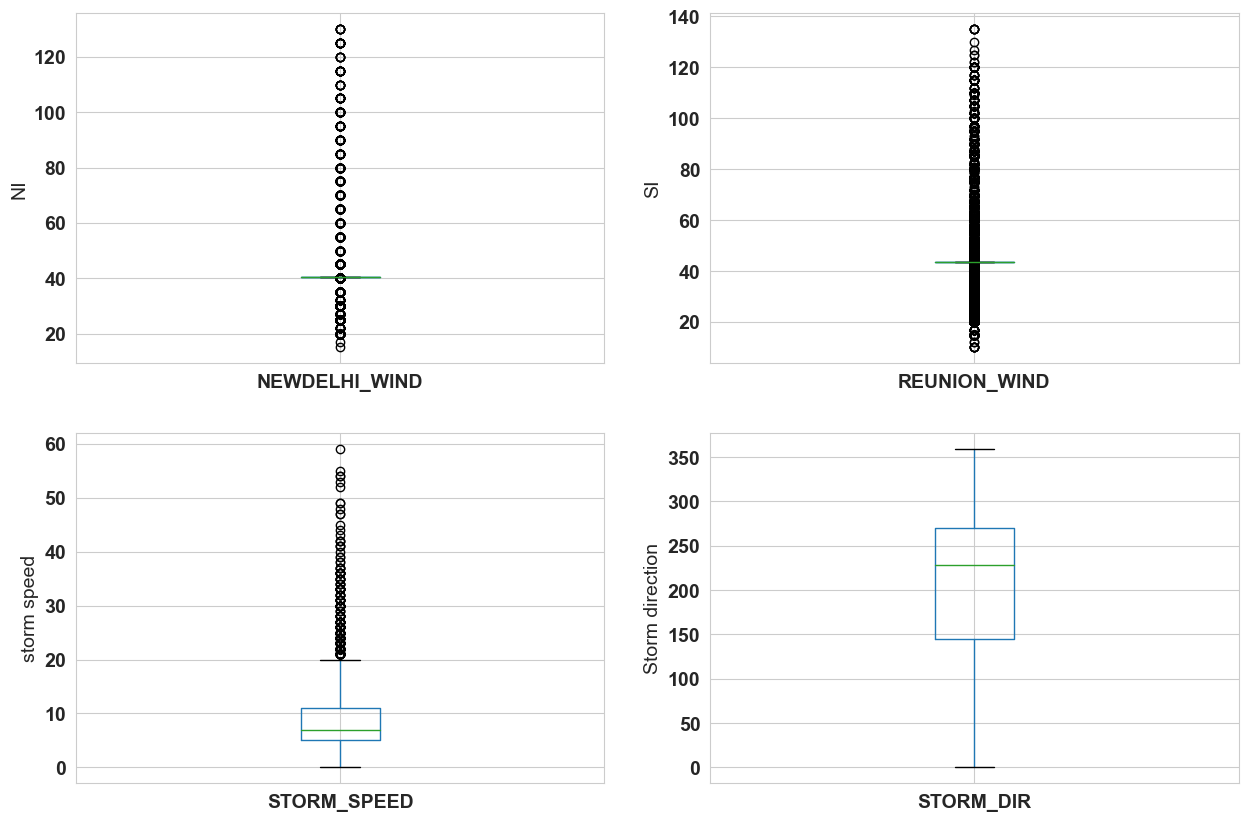

In [773]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='NEWDELHI_WIND')
fig.set_title('')
fig.set_ylabel('NI')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='REUNION_WIND')
fig.set_title('')
fig.set_ylabel('SI')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='STORM_SPEED')
fig.set_title('')
fig.set_ylabel('storm speed')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='STORM_DIR')
fig.set_title('')
fig.set_ylabel('Storm direction')

Text(0, 0.5, 'REUNION_TYPE')

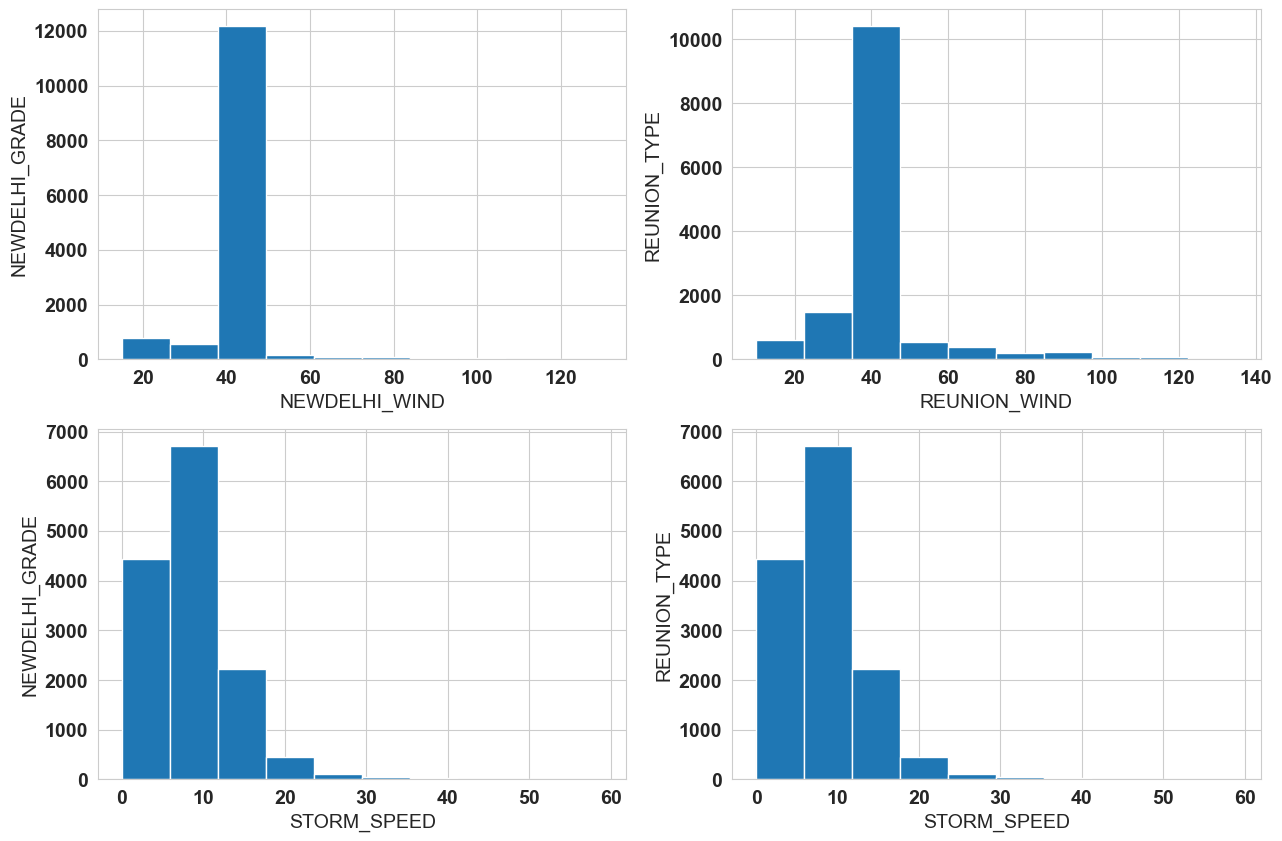

In [774]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.NEWDELHI_WIND.hist(bins=10)
fig.set_xlabel('NEWDELHI_WIND')
fig.set_ylabel('NEWDELHI_GRADE')


plt.subplot(2, 2, 2)
fig = df.REUNION_WIND.hist(bins=10)
fig.set_xlabel('REUNION_WIND')
fig.set_ylabel('REUNION_TYPE')

plt.subplot(2, 2, 3)
fig = df.STORM_SPEED.hist(bins=10)
fig.set_xlabel('STORM_SPEED')
fig.set_ylabel('NEWDELHI_GRADE')


plt.subplot(2, 2, 4)
fig = df.STORM_SPEED.hist(bins=10)
fig.set_xlabel('STORM_SPEED')
fig.set_ylabel('REUNION_TYPE')

In [775]:
# find outliers for Rainfall variable

IQR = df.REUNION_WIND.quantile(0.75) - df.REUNION_WIND.quantile(0.25)
Lower_fence = df.REUNION_WIND.quantile(0.25) - (IQR * 3)
Upper_fence = df.REUNION_WIND.quantile(0.75) + (IQR * 3)
print('Cyclone Speed are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Cyclone Speed are values < 43.47180192572215 or > 43.47180192572215


In [776]:
IQR = df.NEWDELHI_WIND.quantile(0.75) - df.NEWDELHI_WIND.quantile(0.25)
Lower_fence = df.NEWDELHI_WIND.quantile(0.25) - (IQR * 3)
Upper_fence = df.NEWDELHI_WIND.quantile(0.75) + (IQR * 3)
print('Cyclone Speed are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Cyclone Speed are values < 40.55811764705882 or > 40.55811764705882


In [778]:
IQR = df.STORM_SPEED.quantile(0.75) - df.STORM_SPEED.quantile(0.25)
Lower_fence = df.STORM_SPEED.quantile(0.25) - (IQR * 3)
Upper_fence = df.STORM_SPEED.quantile(0.75) + (IQR * 3)
print('Cyclone Speed are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Cyclone Speed are values < -13.0 or > 29.0


In [781]:
#Categorical variables:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['BASIN', 'SUBBASIN', 'NAME', 'NEWDELHI_GRADE', 'REUNION_TYPE'], dtype='object')


In [782]:
#Quantitative variables:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['SEASON', 'LAT', 'LON', 'DIST2LAND', 'LANDFALL', 'WMO_WIND', 'WMO_PRES',
       'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'REUNION_WIND',
       'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED', 'STORM_DIR', 'Year',
       'Month', 'Day'],
      dtype='object')


In [783]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,log_loss

In [815]:
df['Results'] = np.where(df['STORM_DIR'] > 100 , 1,0 )

In [816]:
df.head()

,SEASON,BASIN,SUBBASIN,NAME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,WMO_PRES,...,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Year,Month,Day,Results
0,2015,NI,AS,ASHOBAA,13.10,68.5000,624,601.0,41.300746,991.222042,...,UNK,43.471802,989.403054,21.626368,7,8,2015,6,6,0
1,2015,NI,AS,ASHOBAA,13.45,68.5599,597,584.0,41.300746,991.222042,...,UNK,43.471802,989.403054,21.626368,7,8,2015,6,6,0
2,2015,NI,AS,ASHOBAA,13.80,68.6000,584,571.0,41.300746,991.222042,...,UNK,43.471802,989.403054,21.626368,7,3,2015,6,6,0
3,2015,NI,AS,ASHOBAA,14.15,68.6075,566,551.0,41.300746,991.222042,...,UNK,43.471802,989.403054,21.626368,7,0,2015,6,6,0
4,2015,NI,AS,ASHOBAA,14.50,68.6000,551,538.0,41.300746,991.222042,...,UNK,43.471802,989.403054,21.626368,7,358,2015,6,6,1


In [817]:
X = df[quantitative]
y = df['Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [818]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [819]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [820]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fprate, tprate, thresholds = roc_curve(y_test, y_pred, pos_label=1)

In [821]:
print(model.__class__.__name__+" accuracy is %2.5f" % accuracy_score(y_test, y_pred))

LogisticRegression accuracy is 0.99429


In [822]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 376   12]
 [   4 2409]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       388
           1       1.00      1.00      1.00      2413

    accuracy                           0.99      2801
   macro avg       0.99      0.98      0.99      2801
weighted avg       0.99      0.99      0.99      2801



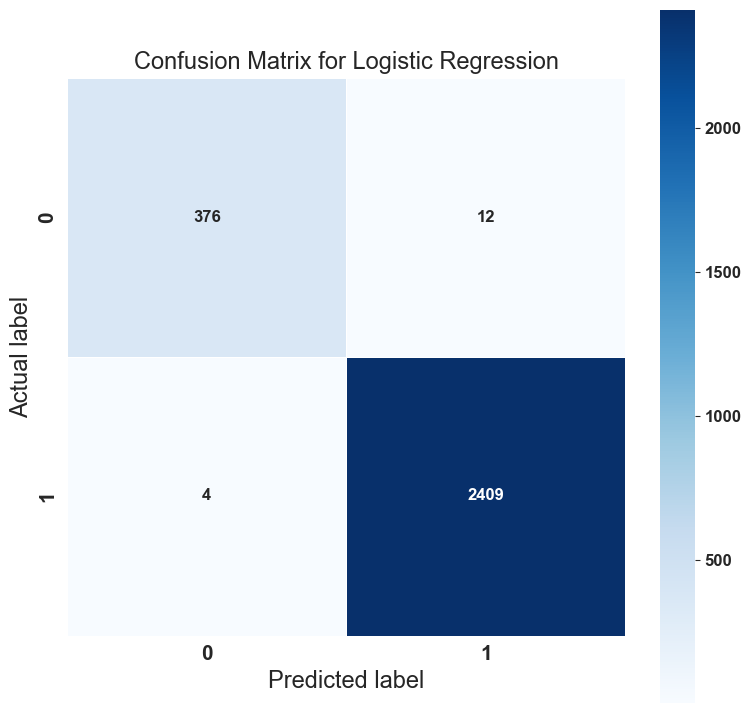

In [823]:
lscore = model.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Confusion Matrix for Logistic Regression'.format(lscore), size = 17);
plt.tick_params(labelsize= 15)

In [824]:
y_pred_prob = model.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.11629879e-01, 8.83701214e-02],
       [9.98960142e-01, 1.03985842e-03],
       [1.81407216e-07, 9.99999819e-01],
       [1.14996901e-12, 1.00000000e+00],
       [3.21388219e-01, 6.78611781e-01],
       [2.55351296e-14, 1.00000000e+00],
       [1.09837061e-04, 9.99890163e-01],
       [8.07551803e-10, 9.99999999e-01],
       [1.95384584e-05, 9.99980462e-01],
       [1.59011027e-10, 1.00000000e+00]])

In [825]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Storm Direction (0)', 'Prob of - Storm Direction (1)'])

y_pred_prob_df

,Prob of - No Storm Direction (0),Prob of - Storm Direction (1)
0,9.116299e-01,0.088370
1,9.989601e-01,0.001040
2,1.814072e-07,1.000000
3,1.149969e-12,1.000000
4,3.213882e-01,0.678612
5,2.553513e-14,1.000000
6,1.098371e-04,0.999890
7,8.075518e-10,1.000000
8,1.953846e-05,0.999980
9,1.590110e-10,1.000000


In [826]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

model.predict_proba(X_test)[0:10, 1]

array([0.08837012, 0.00103986, 0.99999982, 1.        , 0.67861178,
       1.        , 0.99989016, 1.        , 0.99998046, 1.        ])

In [827]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

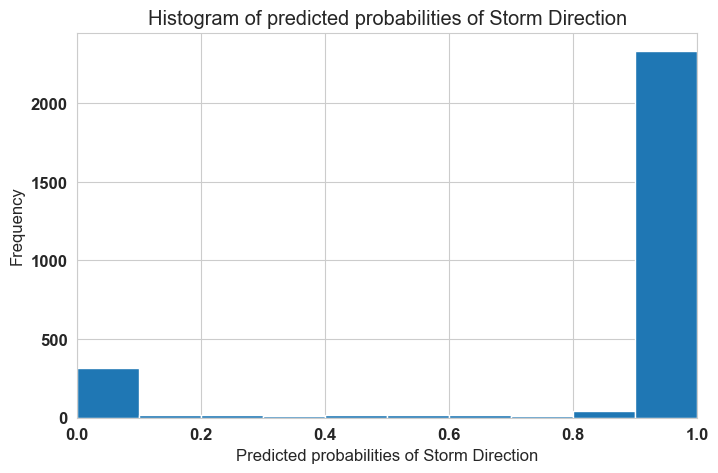

In [828]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Storm Direction')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Storm Direction')
plt.ylabel('Frequency')

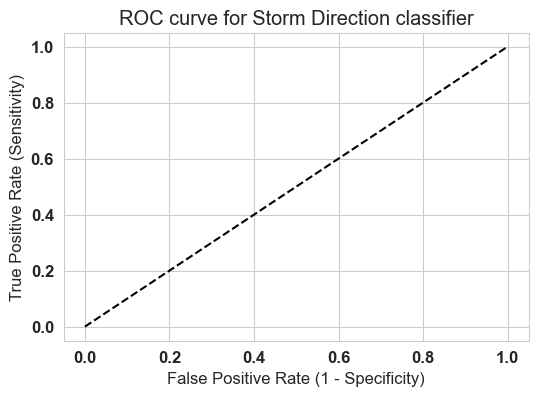

In [831]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Storm Direction classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [832]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9999


In [833]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9999


In [834]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.99598214 0.99732143 0.99508929 0.99553571 0.99285714]


In [835]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9954


In [839]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [842]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch best score : 0.9991


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000)


In [843]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9993
